# Image Classification (MNIST dataset) using Logistic Regression

## Import all neccessary libraries

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data=loadmat('mnist-original.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### Separate the x data from it

In [3]:
x=data['data'].T
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

### Seperate the y data from data

In [4]:
y=data['label'].flatten()
y

array([0., 0., 0., ..., 9., 9., 9.])

### shape of x and y

In [5]:
x.shape

(70000, 784)

In [6]:
y.shape

(70000,)

# Put x and y in a pandas dataframe 

In [7]:
df=pd.DataFrame(np.c_[x,y])

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check the unique values in last column and visulaise it

In [9]:
df[784].value_counts()

1.0    7877
7.0    7293
3.0    7141
2.0    6990
9.0    6958
0.0    6903
6.0    6876
8.0    6825
4.0    6824
5.0    6313
Name: 784, dtype: int64

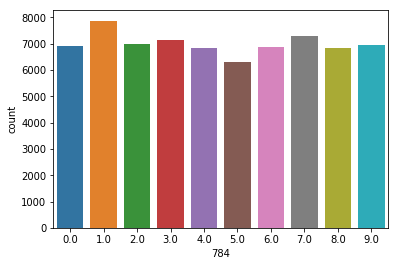

In [10]:
sns.countplot(df[784])

# Train/Test dataset

In [11]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((52500, 784), (52500,), (17500, 784), (17500,))

## Visualisation of training Dataset

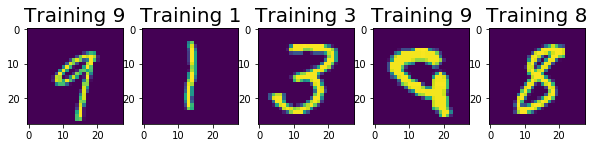

In [13]:
plt.figure(figsize=(10,4))
for index,(image,label) in enumerate(zip(train_x[0:5],train_y[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(28,28)))
    plt.title('Training %d' % label,fontsize=20)
    plt.plot()

# Modeling (Logistic Regression using Scikit Learn)

In [14]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='lbfgs')
lg.fit(train_x,train_y)

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/li

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
pred=lg.predict(test_x)
pred

array([7., 8., 6., ..., 8., 9., 7.])

## Compute the score value

In [16]:
scores=lg.score(test_x,test_y)
scores

0.9158857142857143

# Evaluation of Model

## 1) Confusion Metrics

In [18]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,pred)

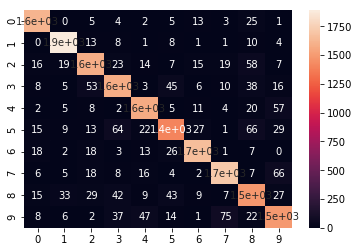

In [19]:
import seaborn as sns
sns.heatmap(cm,annot=True)

## 2) Classification Report

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1677
         1.0       0.96      0.98      0.97      1935
         2.0       0.91      0.90      0.90      1767
         3.0       0.89      0.90      0.89      1766
         4.0       0.93      0.93      0.93      1691
         5.0       0.90      0.85      0.87      1653
         6.0       0.95      0.95      0.95      1754
         7.0       0.93      0.93      0.93      1846
         8.0       0.85      0.87      0.86      1702
         9.0       0.88      0.88      0.88      1709

    accuracy                           0.92     17500
   macro avg       0.92      0.91      0.91     17500
weighted avg       0.92      0.92      0.92     17500



## 3) Jaccard Similarity Score

In [21]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(test_y,pred)

/Users/gauravshrivastava/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9158857142857143

## Predict Probability

In [22]:
ypred_prob=lg.predict_proba(test_x)
ypred_prob

array([[9.30765301e-05, 8.41262491e-19, 3.12841401e-07, ...,
        9.88769752e-01, 4.19168069e-07, 1.05883172e-02],
       [5.27953060e-08, 5.20778278e-09, 2.61830138e-03, ...,
        1.99858089e-15, 9.92168384e-01, 6.31932610e-06],
       [1.12271663e-03, 1.33028824e-08, 2.16008655e-04, ...,
        4.53193416e-16, 2.38837518e-03, 1.24343528e-07],
       ...,
       [2.17939914e-06, 7.28041741e-06, 5.04497854e-03, ...,
        4.67795707e-10, 9.90966820e-01, 3.91751938e-03],
       [1.70324436e-07, 1.42987105e-18, 4.41269652e-09, ...,
        1.64925647e-01, 7.64958423e-04, 8.33696968e-01],
       [2.03973920e-09, 8.19641282e-09, 2.07170276e-06, ...,
        6.56232740e-01, 3.86046158e-04, 3.41117100e-01]])

## 4) Log Loss Method 

In [23]:
from sklearn.metrics import log_loss
log_loss(test_y,ypred_prob)

0.3901105614808069

#  Misclassified Images 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
index=0
m=[]
for label,predict in zip(test_y,pred):
    if label!=predict:
        m.append(index)
    index+=1
        
    

In [25]:
m

[12,
 13,
 25,
 45,
 46,
 56,
 61,
 79,
 85,
 87,
 92,
 93,
 96,
 112,
 129,
 131,
 140,
 147,
 156,
 163,
 177,
 187,
 193,
 207,
 229,
 236,
 249,
 252,
 255,
 277,
 289,
 298,
 307,
 316,
 325,
 334,
 339,
 344,
 385,
 420,
 422,
 423,
 426,
 433,
 455,
 456,
 465,
 474,
 494,
 499,
 504,
 515,
 530,
 531,
 535,
 538,
 540,
 546,
 570,
 580,
 607,
 630,
 640,
 651,
 652,
 657,
 658,
 678,
 689,
 694,
 708,
 714,
 729,
 749,
 769,
 783,
 788,
 813,
 826,
 834,
 862,
 888,
 896,
 910,
 915,
 916,
 928,
 957,
 984,
 986,
 991,
 1027,
 1031,
 1074,
 1075,
 1090,
 1102,
 1109,
 1110,
 1111,
 1114,
 1116,
 1125,
 1139,
 1165,
 1174,
 1181,
 1184,
 1186,
 1188,
 1194,
 1244,
 1250,
 1259,
 1278,
 1282,
 1292,
 1298,
 1299,
 1311,
 1318,
 1329,
 1347,
 1349,
 1354,
 1357,
 1358,
 1366,
 1371,
 1374,
 1378,
 1390,
 1393,
 1413,
 1447,
 1448,
 1454,
 1482,
 1485,
 1491,
 1505,
 1528,
 1530,
 1540,
 1573,
 1578,
 1599,
 1601,
 1610,
 1625,
 1628,
 1638,
 1644,
 1662,
 1663,
 1679,
 1686,
 1693

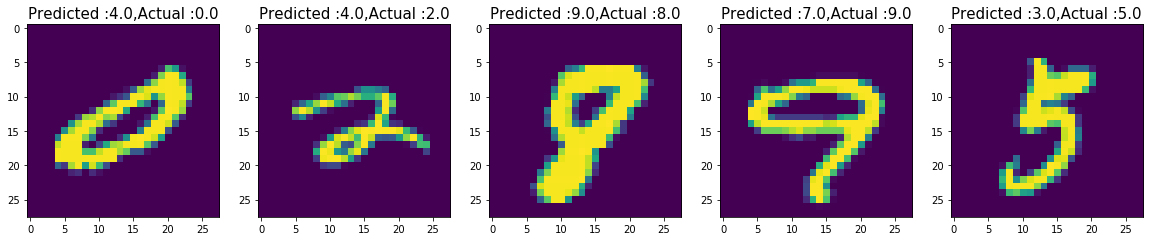

In [28]:
plt.figure(figsize=(20,4))
for i,j in enumerate(m[0:5]):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(test_x[j],(28,28)))
    plt.title('Predicted :{},Actual :{}'.format(pred[j],test_y[j]),fontsize=15)
    plt.plot()